In [49]:
#importing the required libraries and modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
#loading the dataset and preprocessing

df=pd.read_csv("Heart.csv")
df.head()  #showing the first five records

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [51]:
df[:][:]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [9]:
df.shape

(918, 12)

In [10]:
#getting some more info and basic overview of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [63]:
df.isna().sum()  #checking for missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [16]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [20]:
df["HeartDisease"].value_counts()  #checking the distribution of the target variable

HeartDisease
1    508
0    410
Name: count, dtype: int64

## Heart Disease:
1------> heart_patient
0------> NOT heart_patient

In [64]:
#df["ST_Slope"].value_counts()
df["ChestPainType"].value_counts()
#df["RestingECG"].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [52]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [66]:
df["ST_Slope"]=df["ST_Slope"].map({"Flat":0, "Up":1, "Down":-1})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,1,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,0,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,0,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,0,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,0,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,0,1


In [67]:
df["Sex"]=df["Sex"].map({"M":0, "F":1}) 
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,1,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,0,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,1,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,0,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,N,1.2,0,1
914,68,0,ASY,144,193,1,Normal,141,N,3.4,0,1
915,57,0,ASY,130,131,0,Normal,115,Y,1.2,0,1
916,57,1,ATA,130,236,0,LVH,174,N,0.0,0,1


In [68]:
df["ChestPainType"]=df["ChestPainType"].map({"ATA":0, "NAP":1,"TA":2, "ASY":-1}) 
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,Normal,172,N,0.0,1,0
1,49,1,1,160,180,0,Normal,156,N,1.0,0,1
2,37,0,0,130,283,0,ST,98,N,0.0,1,0
3,48,1,-1,138,214,0,Normal,108,Y,1.5,0,1
4,54,0,1,150,195,0,Normal,122,N,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,2,110,264,0,Normal,132,N,1.2,0,1
914,68,0,-1,144,193,1,Normal,141,N,3.4,0,1
915,57,0,-1,130,131,0,Normal,115,Y,1.2,0,1
916,57,1,0,130,236,0,LVH,174,N,0.0,0,1


In [69]:
df["RestingECG"]=df["RestingECG"].map({"Normal":0, "LVH":1, "ST":-1}) 
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,N,0.0,1,0
1,49,1,1,160,180,0,0,156,N,1.0,0,1
2,37,0,0,130,283,0,-1,98,N,0.0,1,0
3,48,1,-1,138,214,0,0,108,Y,1.5,0,1
4,54,0,1,150,195,0,0,122,N,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,2,110,264,0,0,132,N,1.2,0,1
914,68,0,-1,144,193,1,0,141,N,3.4,0,1
915,57,0,-1,130,131,0,0,115,Y,1.2,0,1
916,57,1,0,130,236,0,1,174,N,0.0,0,1


In [70]:
df["ExerciseAngina"]=df["ExerciseAngina"].map({"N":0, "Y":1})

In [71]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,1,0
1,49,1,1,160,180,0,0,156,0,1.0,0,1
2,37,0,0,130,283,0,-1,98,0,0.0,1,0
3,48,1,-1,138,214,0,0,108,1,1.5,0,1
4,54,0,1,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,2,110,264,0,0,132,0,1.2,0,1
914,68,0,-1,144,193,1,0,141,0,3.4,0,1
915,57,0,-1,130,131,0,0,115,1,1.2,0,1
916,57,1,0,130,236,0,1,174,0,0.0,0,1


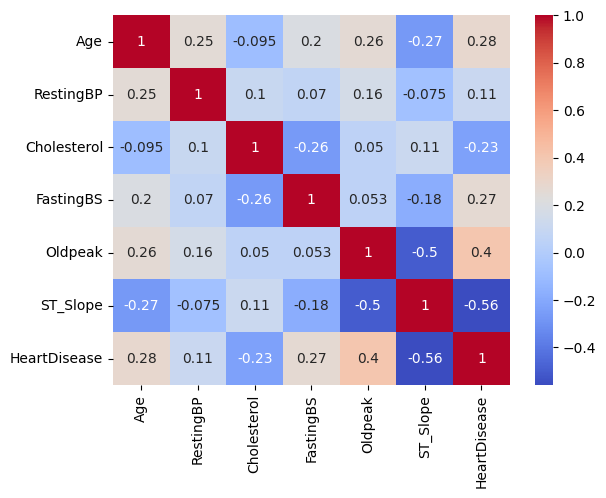

In [37]:
sns.heatmap(df[["Age","RestingBP","Cholesterol","FastingBS","Oldpeak","ST_Slope","HeartDisease"]].corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Age', ylabel='HeartDisease'>

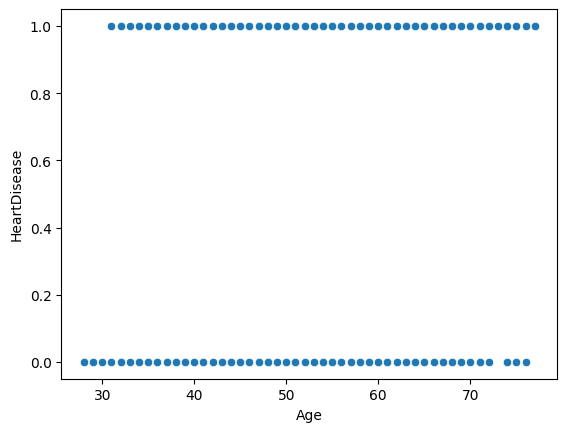

In [38]:
sns.scatterplot(df,x='Age', y='HeartDisease')

<Axes: xlabel='Oldpeak', ylabel='HeartDisease'>

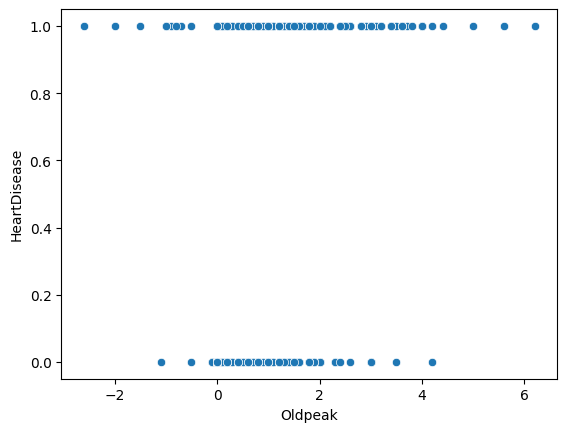

In [41]:
sns.scatterplot(df,x='Oldpeak', y='HeartDisease')